<a href="https://colab.research.google.com/github/vitorbeltrao/Medical_Insurance_Forecast/blob/main/Projeto_MachineLearning_SeguroMedico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning - Previsão de preço de seguro médico: uma abordagem bem completa

Neste projeto, iremos analisar um projeto de ponta a ponta como cientistas de dados em uma empresa. Para essa tarefa, iremos seguir os seguintes passos:

1. Analisar o panorama geral - Entendendo o problema do negócio;
2. Obter os dados;
3. Análise Exploratória dos dados;
4. Limpeza e preparação dos dados;
5. Selecionar e treinar um modelo de machine learning;
6. Aperfeiçoar o modelo;
7. Apresentar a solução.

Vamos abordando cada passo descrito acima detalhadamente em tópicos. Vamos lá!

## 1 - Analisar o Panorama Geral

### 1.1 - Abordar o problema

Em primeiro lugar, você deve **entender a motivação do problema**. Você deve se perguntar e perguntar ao responsável **qual é exatamente o objetivo do negócio**? **Como a empresa espera usar e se beneficiar desse modelo**? Saber isso é importante para guiar a forma que você abordará o problema, quais algoritmos irá escolher, qual indicador de desempenho utilizará para avaliar seu modelo.

No caso desse projeto, o objetivo do negócio é: **Prever o preço do seguro médico.**

<center><img src="https://image.freepik.com/free-photo/health-benefits-claim-benefits-form-concept_53876-134044.jpg" height="300"></center>

A empresa vai se beneficiar desse modelo, visto que, com ele em mãos, conseguirá fornecer um preço de seguro ao seus clientes de forma rápida, prática e assertiva, economizando uma das coisas mais importantes para uma empresa, dinheiro. A empresa pode também, usar o modelo para redefinir o preço do seguro de um cliente já existente, deixando de perder dinheiro também. **Você irá precisar de todas essas informações acima para prosseguir com a solução.**

Com a posse desse conhecimento inicial, você deve ainda responder a outras perguntas como:
* **Quais são as soluções/alternativas atuais (caso existam)?**
* **Como você deve abordar este problema (aprendizado supervisionado/não supervisionado; online/offline; baseado em instância ou em modelo)?**
* **Como o desempenho deve ser medido? Ele está alinhado com o objetivo do negócio?**
* **Qual seria o desempenho mínimo necessário para alcançar o objetivo do negócio?**
* **Você pode reutilizar experiências ou ferramentas de outros projetos similares?**
* **Tem expertise humana disponível?**

É claro que essas perguntas podem variar de projeto para projeto, podem ser colocadas outras questões além destas ou, nem todas essas listadas, precisam necessariamente serem respondidas. Não é uma receita de bolo, mas essas listadas costumam servir para a maioria dos projetos de ciência de dados.

No caso desse projeto, claramente temos uma tarefa típica de **aprendizado supervisionado**, uma vez que há exemplos rotulados de treinamento. Além do mais, também é uma típica tarefa de **regressão**, pois, estamos tentando prever um valor contínuo. Em termos específicos, trata-se de um problema de **regressão linear múltipla univariada**. Por fim, podemos utilizar o sistema de aprendizagem **offline ou em batch com instância baseada em modelo**.





### 1.2 - Escolha uma medida de desempenho

O próximo passo é escolher uma medida de desempenho. Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de regressão, vamos testar o desempenho do modelo em cima do nosso conjunto de validação e teste usando as métricas abaixo:

* ***R2 Score -*** métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

* ***Mean Absolut Error (MAE) -*** é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* ***Mean Squared Error (MSE) -*** é a média dos quadrados dos erros e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

### 1.3 - Verifique as hipóteses

Por último, uma boa prática é enumerar e verificar as hipóteses feitas até agora (por você ou por outros, assim fica fácil identificar os problemas logo de início). **Você não vai querer descobrir potenciais problemas após trabalhar semanas ou meses em um modelo equivocado.**

<center><img src="https://image.freepik.com/free-vector/illustration-list_53876-28518.jpg" height="300"></center>

## 2 - Obter os Dados

Hora de colocar a mão na massa! Os dados desse projeto foram extraídos do [Kaggle](https://www.kaggle.com/).

Em ambientes tradicionais, os dados estariam disponíveis em um banco de dados relacional (ou em algum outro data store) e distribuídos por várias tabelas/documentos/arquivos. Neste projeto as coisas são bem mais simples: Vamos fazer o download dos dados que estão em um formato csv e transformá-los em um dataframe pandas para começar a trabalhar!

In [1]:
# Importar os pacotes necessários.
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Código que transforma o csv em um dataframe pandas
df = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Medical_Insurance_Forecast/main/data/insurance.csv")

### 2.1 - Uma rápida olhada na estrutura dos dados

Antes de separar o conjunto em treino e teste e realizar uma análise exploratória mais aprofundada, vamos dar uma olhada rápida no nosso conjunto de dados.

* Verificar as 5 primeiras linhas do conjunto de dados

In [2]:
# Verificar as 5 primeiras linhas do conjunto de dados
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Cada linha representa um cliente da empresa que paga pelo serviço de seguro cujo valor está representado na coluna 'charges'. Essa variável será a nossa variável alvo ou dependente.

O restante das colunas serão as nossas variáveis independentes que representam algumas características básicas dos clientes e que tentarão prever com precisão os valores da variável alvo 'charges'.

* Verificar o tamanho, tipo e valores nulos dos dados

In [3]:
# Verificar o tamanho, tipo e valores nulos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Temos um conjunto de dados relativamente pequeno, com 1338 entradas, colunas de diversos tipos (int, floats e strings) que em etapas posteriores teremos que aplicar algum tipo de tratamento e não temos nenhum valor nulo o que é muito bom para a análise.

* Verificar o resumo estatístico dos dados

In [4]:
# Verificar o resumo estatístico dos dados
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Os dados parecem estar de acordo, sem nenhum outlier. Essas medidas estatísticas em questão nos permitem ver como os dados estão distribuidos em termos de posição. 

Outra maneira rápida de se ter uma ideia do tipo de dados com os quais você está lidando, é plotar um um histograma para cada atributo numérico.

* Gráfico histograma

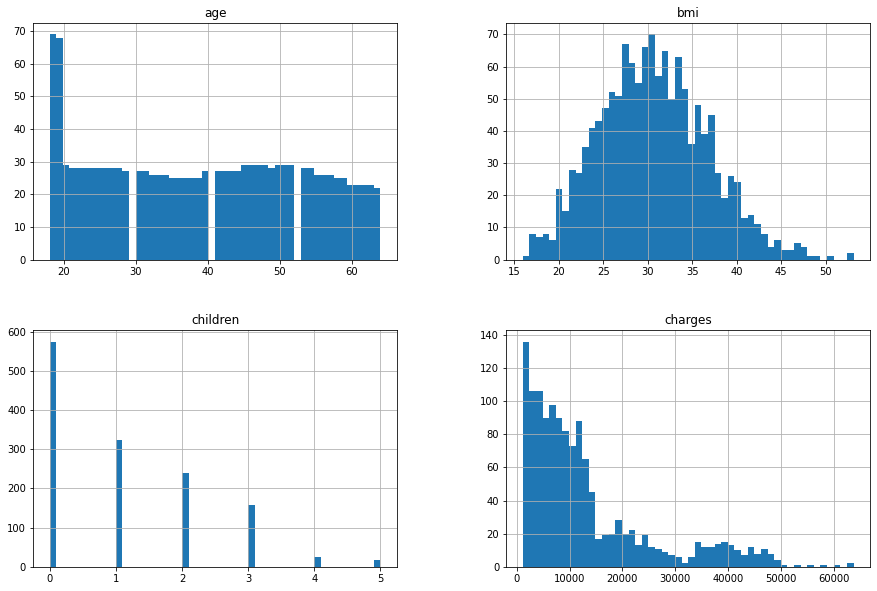

In [5]:
# Gráfico histograma
df.hist(bins = 50, figsize=(15,10))
plt.show()

Você deve perceber algumas coisas nesses histogramas:

1. As variáveis 'age' e 'children' possuem saídas discretas com alguns picos em determinados valores;
2. Esses atributos tem escalas muito diferentes. Analisaremos isso mais adiante, quando explorarmos o escalonamento das variáveis;
3. O histograma da variável 'bmi' se assemelha a uma normal, com uma cauda um pouco mais longa a direita;
4. O histograma da variável 'charges' apresenta uma longa cauda a direita, isso pode dificultar a detecção de padrões em alguns algoritmos de machine learning.

Tentaremos transformar esses atributos posteriormente, a fim de conseguirmos mais distribuições em forma de sino (normais).

### 2.2 - Criando um conjunto de testes

Pode parecer estranho separar o conjunto de dados nessa altura do campeonato. Você apenas deu uma rápida olhada na estrutura dos dados e claramente precisa se aprofundar mais nessa etapa de exploração. A verdade é que nosso cérebro detecta padrões muito facilmente, ou seja, somos propensos ao overfitting: Se você se aprofundar na exploração do conjunto de testes, pode bater o olho em algum padrão interessante, o que o levará a escolha de um algoritmo específico.

Quando você for estimar o erro de generalização, usando o conjunto de testes, sua estimativa será otimista demais e você acabará disponibilizando em produção um sistema que não terá o desempenho esperado. **Isso se chama *data snooping bias*.**



In [6]:
# Separando o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
train_set_size = len(train_set)
test_set_size = len(test_set)

print('Tamanho do conjunto de treino:', train_set_size)
print('Tamanho do conjunto de test:', test_set_size)

Tamanho do conjunto de treino: 1070
Tamanho do conjunto de test: 268


## 3 - Análise Exploratória

Até o momento, você teve um pequeno vislumbre de como as coisas funcionam para entender o conjunto de dados que você está manipulando. Agora o objetivo é aprofundar um pouco mais.

**Vamos explorar mais a fundo todo o conjunto de dados de treino.**

In [7]:
# Criar uma cópia do conjunto de treinamento
insurance_train = train_set.copy()

### 3.1 - Transformar variáveis qualitativas

Em diversos conjuntos de dados, esse tipo de transformação é necessária, já que os modelos de machine learning não entendem variáveis qualitativas. Nesse caso, iremos transformá-las em quantitativas, para que o modelo possa ser alimentado.

Estamos fazendo transformações nessa etapa, pois, iremos fazer uma análise exploratória e quero que essas variáveis também façam parte dessa análise.

In [8]:
# Transformando as variáveis qualitativas categóricas
insurance_train = pd.get_dummies(insurance_train)

# Excluindo uma das variáveis redundantes
insurance_train = insurance_train.drop(['sex_female', 'smoker_no'], axis=1)
insurance_train.rename(columns={'sex_male': 'sex', 'smoker_yes': 'smoker'}, inplace=True)

# Agora temos apenas uma coluna 'sex' e 'smoker'
# Para a coluna sexo, male = 1 and female = 0
# Para a coluna fumante, smoker = 1 and non-smoker = 0
insurance_train.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,9193.83850,0,0,0,1,0,0
1285,47,24.32,0,8534.67180,0,0,1,0,0,0
1142,52,24.86,0,27117.99378,0,0,0,0,1,0
969,39,34.32,5,8596.82780,0,0,0,0,1,0
486,54,21.47,3,12475.35130,0,0,0,1,0,0


Agora sim, o conjunto de dados será explorado de forma completa, além de estar no formato correto para alimentar os algoritmos de machine learning.

### 3.2 - Buscando correlações

A correlação mede o grau em que dois fenômenos estão relacionados entre si. O poder da correlação como uma ferramenta estatística é que podemos encapsular uma associação entre duas variáveis ​​em uma única estatística descritiva: **O coeficiente de correlação.**

Duas variáveis ​​são positivamente correlacionadas se uma variação em uma delas estiver associada a uma variação na outra na mesma direção. Da mesma forma, são negativamente correlacionados se uma variação em uma delas estiver associada a uma variação na outra na direção oposta.

O coeficiente de correlação é um único número que varia de -1 a 1. Uma correlação de 1 é chamada de correlação positiva perfeita. Uma correlação de -1 é chamada de correlação negativa perfeita. Uma correlação de 0 significa que as variáveis ​​não têm associação significativa entre si.

**Uma coisa excelente sobre o coeficiente de correlação é que ele não está vinculado a nenhuma unidade.**

**O aspecto complicado deste tipo de associação é que nem todos os pontos de dados necessariamente se encaixam no padrão.**



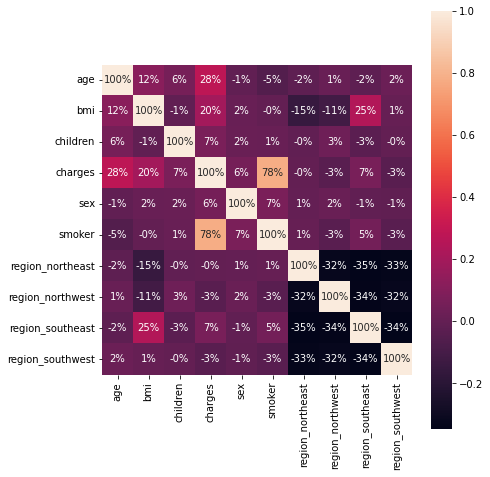

In [9]:
# Análise da correlação de pearson entre as variáveis
corr = insurance_train.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

Não vemos relações tão significativas entre as variáveis independentes, o que é bom, pois, não temos variáveis colineares (redundantes). Também não vemos relações significativas das variáveis independentes com a variável dependente, exceto a variável 'smoker' que possui forte correlação. Vamos plotar essas relações com a variável dependente junto do p-value, para vermos o grau de certeza que temos nestes valores.

Além do coeficiente de correlação, podemos usar o p-value para garantir que as correlações que estamos vendo no gráfico são significativas.

<img src="https://github.com/vitorbeltrao/Pictures/blob/main/correlacao%20e%20pvalue.png?raw=true" width="50%">

In [10]:
# Verificar o p-value com a variável alvo
from scipy import stats
for col in insurance_train:
    y = insurance_train['charges']
    X = insurance_train[col]
    pearson_coef, p_value = stats.pearsonr(X, y)
    print(col, '- Pearson:',pearson_coef, '- p-value:', p_value)

age - Pearson: 0.2817208166410557 - p-value: 5.6944808440626626e-21
bmi - Pearson: 0.19731629949070123 - p-value: 7.467475822625886e-11
children - Pearson: 0.07188497467963079 - p-value: 0.018687166961159206
charges - Pearson: 1.0 - p-value: 0.0
sex - Pearson: 0.056802443755458024 - p-value: 0.06325648046004716
smoker - Pearson: 0.780062513309504 - p-value: 1.0360773472184353e-219
region_northeast - Pearson: -0.0006278461628282585 - p-value: 0.9836338375850079
region_northwest - Pearson: -0.03377597331279535 - p-value: 0.26965191719174403
region_southeast - Pearson: 0.06749133443601293 - p-value: 0.027269638099013147
region_southwest - Pearson: -0.034994111286059636 - p-value: 0.25274823795795065


As variáveis que possuem forte relações lineares positivas com a 'charges' são: 'age', 'bmi' e 'smoker', com destaque para essa última. O restante não possui forte correlação linear, já que os coeficientes deram todos próximos de 0.

Uma outra forma de ver essa relações seria plotando um gráfico de dispersão.

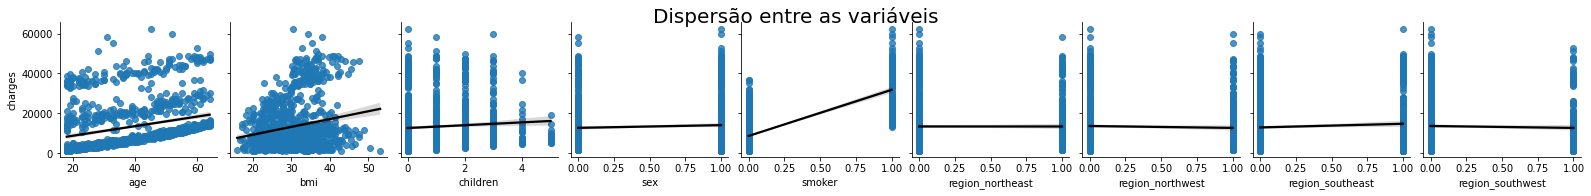

In [11]:
# Usando o gráfico de dispersão para verificar as relações entre variáveis
ax = sns.pairplot(insurance_train, y_vars='charges', x_vars=['age', 'bmi', 'children', 
                                                             'sex', 'smoker',
                                                             'region_northeast', 'region_northwest',
                                                             'region_southeast', 'region_southwest'], 
                                                             kind='reg', plot_kws={'line_kws':{'color':'black'}})

ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
plt.show()

Graficamente confirmamos o que vimos acima, apenas as variáveis 'age', 'bmi' e 'smoker' possuem fortes relações lineares com a variável 'charges'.

Os atributos mais promissores para prever o valor das cobranças (charges) são esses citados acima.

### 3.3 - Testando combinações de atributo

Espero que os itens anteriores tenham lhe passado uma boa noção no que diz respeito a algumas formas de explorar e obter informações úteis. Foi possível observar também, que alguns atributos tem uma cauda longa de distribuição, assim sendo, talvez você queira transformá-los (por exemplo utilizando o logaritmo). Obviamente que sua linha de atuação será diferente em cada projeto, mas as ideias gerais são semelhantes.

Uma última coisa que você pode querer fazer antes de preparar os dados para os algoritmos de machine learning é identificar diversas combinações de atributos, como uma espécie de feature engineering. Nesse exemplo aqui, podemos discretizar a variável 'bmi' a fim de tentar melhorar a explicabilidade do modelo.

<center><img src="https://image.freepik.com/free-vector/science-laboratory-illustration_1284-19152.jpg" height="300"></center>

Deixei a ideia aqui para você aplicar nos seus projetos. Falaremos mais sobre feature engineering no próximo tópico. 



## 4 - Limpeza e preparação dos dados

É hora de preparar os dados para seus algoritmos de machine learning. Você deve escrever funções para as seguintes razões:    

* Isso lhe possibilitará reproduzir essas transformações facilmente em qualquer conjunto de dados;
* Você construirá aos poucos uma biblioteca de funções de transformação que poderão ser reutilizadas em projetos futuros;
* Você pode usar essas funções em seu sistema ativo para transformar os dados novos, antes de fornecê-los aos algoritmos;
* Isso lhe possibilitará testar várias transformações facilmente e identificar qual combinação funciona melhor.




### 4.1 - Limpando os dados

A limpeza dos dados consiste em:

* Corrigir ou remover outliers (caso necessário);
* Preencher os valores ausentes ou eliminar suas linhas ou colunas (caso necessário).

No nosso caso não temos nenhum valor ausente, mas acredito que temos alguns outliers na variável 'bmi' devido a cauda presente no histograma visto no tópico 2. Vamos eliminá-los.

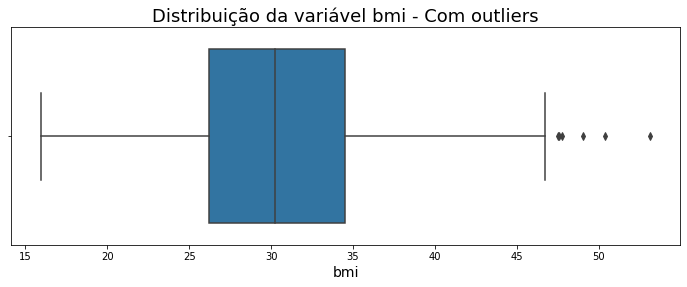

In [12]:
# Criar uma cópia do dataframe
insurance_clean = insurance_train.copy()

# Boxplot para verificar a existência dos outliers
ax = sns.boxplot(x = 'bmi', data = insurance_clean, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição da variável bmi - Com outliers', fontsize=18)
ax.set_xlabel('bmi', fontsize=14)
ax

In [13]:
# Função de eliminação de outliers
def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

In [14]:
# Eliminar outliers
numerical_cols = ['bmi']
for col in numerical_cols:
  exclui_outliers(insurance_clean, col)

[3.9500000e+01 3.0205000e+01 1.0000000e+00 9.5754421e+03 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


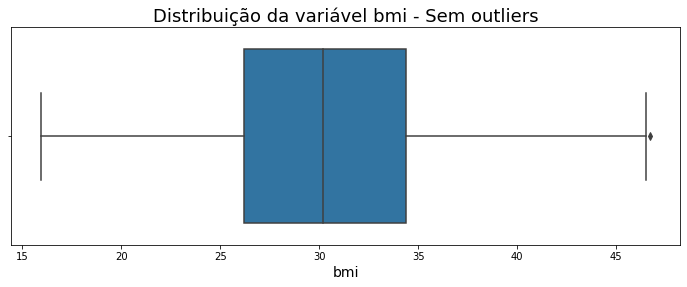

In [15]:
# Substituir os valores ausentes pela mediana utilizando a função 'imputer'
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(insurance_clean)
print(imputer.statistics_)
X_input = imputer.transform(insurance_clean)
insurance_clean = pd.DataFrame(X_input, columns = insurance_clean.columns,
                               index = insurance_clean.index)

# Verificar boxplot novamente
ax = sns.boxplot(x = 'bmi', data = insurance_clean, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição da variável bmi - Sem outliers', fontsize=18)
ax.set_xlabel('bmi', fontsize=14)
ax

Veja só, com as nossas funções conseguimos eliminar diversos outliers e substituí-los pela mediana. Optei pela mediana, justamente por ela ser menos sensível a outliers.

Para fazer isso, utilizamos duas funções:
1. A primeira, é a função de eliminação dos outliers que estão a 2,7 desvios-padrões acima e abaixo da respectiva variável.

<img src='https://github.com/vitorbeltrao/Pictures/blob/main/distribui%C3%A7%C3%A3o%20normal.png?raw=true' width='50%'>

Uma das distribuições mais comuns, importantes e úteis em estatística é a **distribuição normal**. Dados distribuídos normalmente são simétricos em torno da sua média, num formato de sino, conforme gráfico acima.

Continuando nossa análise do desvio padrão, numa distribuição normal conhecemos exatamente que proporção das observações cai dentro de um desvio padrão da média (68,2%), dentro de dois desvios padrões da média (95,4%), dentro de três desvios padrões (99,7%) e assim por diante. **Este é o alicerce sobre qual se fundamenta grande parte da estatística**.

Vimos no tópico 2, que o histograma da variável 'bmi' se assemelhava a uma normal, por isso utilizamos essa estratégia aqui.

2. A segunda, foi uma função de imputação. A [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) se encarrega dos valores ausentes. Originalmente não tínhamos nenhum valor ausente no conjunto de dados, mas ao aplicar a primeira função (descrita acima) os valores que eram outliers ficaram nulos, e então utilizamos a função de imputação para preenchê-los com a mediana do conjunto.

Vale ressaltar, que a 'imputer' simplesmente calculou a média de cada variável e armazenou o resultado em sua variável 'statistics_'. Somente a variável 'bmi' tinha valores ausentes, mas não podemos ter certeza de que não haverá valores ausentes nos dados novos, uma vez que o sistema entre em produção, por isso é mais seguro aplicar a 'imputer' a todos os atributos numéricos. 

### 4.2 - Feature Engineering

***Feature Engineering*** é usar dados, dentro do domínio do conhecimento, e criar *features* novas para o seu conjunto de dados. Quando você entende esse conceito e aplica corretamente as técnicas de engenharia, melhora ainda mais a capacidade de previsão do seu modelo de machine learning.

> *The algorithms we used are very standard for Kagglers. […]  We spent most of our efforts in feature engineering  (Xavier Conort)*

Utilizamos essa técnica geralmente para:     
* Discretizar características contínuas;
* Decompor as características (categóricas, data/hora, etc.);
* Adicionar transformações promissoras de características (log(x), sqrt(x), x², etc.);
* Agregar características em novas características promissoras com base em seu conhecimento de negócio.

No nosso caso aqui, iremos apenas discretizar a variável 'bmi', ou seja, atualmente ela é uma variável contínua, vamos passa-la para categórica.


In [16]:
# Função que trocará a variável 'bmi' para categórica
def weightCondition(bmi):
  if bmi < 18.5:
    return "Underweight"
  elif (bmi >= 18.5) & (bmi < 24.986):
    return "Normal"
  elif (bmi >= 25) & (bmi < 29.926):
    return "Overweight"
  else:
    return "Obese"
insurance_clean["weight_Condition"] = [weightCondition(val) for val in insurance_clean["bmi"]]
insurance_clean.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,weight_Condition
560,46.0,19.95,2.0,9193.83850,0.0,0.0,0.0,1.0,0.0,0.0,Normal
1285,47.0,24.32,0.0,8534.67180,0.0,0.0,1.0,0.0,0.0,0.0,Normal
1142,52.0,24.86,0.0,27117.99378,0.0,0.0,0.0,0.0,1.0,0.0,Normal
969,39.0,34.32,5.0,8596.82780,0.0,0.0,0.0,0.0,1.0,0.0,Obese
486,54.0,21.47,3.0,12475.35130,0.0,0.0,0.0,1.0,0.0,0.0,Normal


Veja a nossa nova coluna 'weight_Condition'. Agora vamos aplicar outra função que transforme suas entradas qualitativas em quantitativas, para que nosso algoritmo de machine learning aceite suas entradas.

In [17]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 3.0 MB/s 


In [18]:
# transformando a coluna 'weight_Condition'
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

encoder = ce.OrdinalEncoder(cols=['weight_Condition'], return_df=True,
                            mapping=[{'col':'weight_Condition',
                                      'mapping':{'Underweight':0,
                                                 'Normal':1, 
                                                 'Overweight':2,
                                                 'Obese':3 
                                                 }}])

insurance_clean = encoder.fit_transform(insurance_clean)
insurance_clean.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,weight_Condition
560,46.0,19.95,2.0,9193.83850,0.0,0.0,0.0,1.0,0.0,0.0,1
1285,47.0,24.32,0.0,8534.67180,0.0,0.0,1.0,0.0,0.0,0.0,1
1142,52.0,24.86,0.0,27117.99378,0.0,0.0,0.0,0.0,1.0,0.0,1
969,39.0,34.32,5.0,8596.82780,0.0,0.0,0.0,0.0,1.0,0.0,3
486,54.0,21.47,3.0,12475.35130,0.0,0.0,0.0,1.0,0.0,0.0,1


Nosso conjunto de dados está praticamente pronto para alimentar os algoritmos de machine learning, vamos seguir para uma última etapa extremamente importante.

### 4.3 - Escalonamento das características
Uma das transformações fundamentais que você precisa aplicar aos dados é o escalonamento de características. Salvo raras exceções, os algoritmos de machine learning não funcionam bem quando variáveis numéricas de entrada tem escalas muito diferentes.

<center><img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/magnitude.jpeg" height="300"></center>

**Geralmente não é necessário escalonar as entradas da variável alvo.**

Há duas formas comuns de todas as variáveis terem a mesma escala: *min-max scaler* e *standard scaler*.

O escalonamento min-max (muitos chamam de normalização) é bastante simples: os valores são basicamente deslocados e reescalonados de modo que acabam variando de 0 a 1.

Com a padronização (standard scaler) a coisa é diferente: ela não vincula valores a um intervalo específico, o que pode ser um problema para alguns algoritmos (por exemplo as redes neurais, que geralmente esperam um valor de entrada que varia de 0 a 1). No entanto, a padronização não é tão afetada pelos outliers.

In [19]:
# Cópia do dataframe
df_train_final = insurance_clean.copy()

# Separar os dados entre feature matrix e target vector
X_val = df_train_final.drop('charges', axis=1)
y_val = df_train_final['charges']

# Escalonamento das variáveis
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_val)
X_val_scaled = scaler.transform(X_val)
X_val_scaled

array([[ 0.47222651, -1.78829765,  0.73433626, ..., -0.59966106,
        -0.5723141 , -1.64560516],
       [ 0.54331294, -1.04428512, -0.91119211, ..., -0.59966106,
        -0.5723141 , -1.64560516],
       [ 0.8987451 , -0.95234765, -0.91119211, ...,  1.66760869,
        -0.5723141 , -1.64560516],
       ...,
       [ 1.3252637 , -0.89871746, -0.91119211, ..., -0.59966106,
        -0.5723141 , -0.39946396],
       [-0.16755139, -0.0423369 ,  0.73433626, ..., -0.59966106,
         1.74729228,  0.84667725],
       [ 1.1120044 , -0.09426455, -0.91119211, ..., -0.59966106,
         1.74729228, -0.39946396]])

#### Pipelines
Como você pode ver, existem muitas etapas de transformação de dados que precisam ser executadas na ordem correta. Felizmente a Scikit-Learn fornece a classe [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) para ajudar com essas sequências de transformações.

## 5 - Selecionar e treinar um modelo
Você abordou o problema, obteve os dados e os explorou, gerou uma amostra de um conjunto de treinamento e de um conjunto de testes e escreveu funções e/ou pipelines de transformação para limpar e preparar seus dados para os algoritmos de machine learning. Agora chegou o momento de escolher e treinar um modelo de machine learning.

### 5.1 - Baseline

Gosto de começar essa seleção de algoritmos definindo um baseline. Esse modelo base, será uma espécie de guia, o desempenho a ser batido. Faremos esse modelo com um algoritmo rápido e simples, a [regressão linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Avaliaremos os modelos utilizando a validação cruzada para evitar o *overfitting*, uma boa alternativa é usar o método *k-fold*. O código a seguir divide aleatoriamente o conjunto de treinamento em cinco subconjuntos distintos chamados *folds*, depois treina e avalia o modelo cinco vezes, escolhendo sempre um fold diferente para avaliação e treinamento dos outros quatro folds. O resultado é um array que contém cinco classificações de avaliação.

In [20]:
# Treinando e avaliando o baseline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_val_scaled, y_val,
                             scoring = 'neg_mean_squared_error', cv = 5)
lin_rmse_scores = np.sqrt(-lin_scores)

# Função de avaliação dos resultados
def display_scores(scores):
  print('Scores:', scores)
  print('Média:', scores.mean())
  print('Desvio Padrão:', scores.std())

# Avaliação do baseline
display_scores(lin_rmse_scores)

Scores: [6317.74383243 5574.78828225 5953.68319104 6820.30434157 5913.02639459]
Média: 6115.909208374452
Desvio Padrão: 423.6036573607441


Esse é o desempenho base, que vamos tentar melhorar com outros modelos.

### 5.2 - Avaliando outros modelos
Você deve testar muitos outros modelos de diversas categorias de algoritmos de machine learning, sem despender muito tempo aprimorando os hiperparâmetros. O objetivo é selecionar alguns (dois a cinco) modelos promissores.

In [21]:
# Importando os pacotes dos modelos a serem avaliados
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor

# Instanciar os modelos
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
svm_reg = svm.SVR()
sgd_reg = SGDRegressor()
gbr_reg = GradientBoostingRegressor()
pls_reg = PLSRegression()
mlp_reg = MLPRegressor()

# Treinar e avaliar os modelos
df_result = pd.DataFrame()
for model in (tree_reg, rf_reg, svm_reg, sgd_reg, gbr_reg, pls_reg, mlp_reg):
    scores = cross_val_score(model, X_val_scaled, y_val,
                             scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-scores)
    mean = rmse_scores.mean()
    std = rmse_scores.std()
    df_result = df_result.append({
                                  'MODELO': model, 'SCORES': rmse_scores, 
                                  'MEDIA_SCORES': mean, 'STD_SCORES': std 
                                  }, ignore_index=True)
    
# Organizar o dataframe
# Dividindo a lista de scores em colunas separadas
df_scores = df_result['SCORES'].apply(pd.Series)
df_scores.columns=["SCORE_1", "SCORE_2", "SCORE_3","SCORE_4", "SCORE_5"]

# Concatenando os dataframes formados
df_result = pd.concat([df_result, df_scores], axis=1)

# Excluindo a coluna 'SCORES'
df_result.drop('SCORES', axis=1, inplace=True)

# Transformando a coluna 'MODELO' em string
df_result['MODELO'] = df_result['MODELO'].astype('string')

# Reorganizando o dataframe final
df_result = df_result[['MODELO', 'SCORE_1', 'SCORE_2', 'SCORE_3',
                       'SCORE_4', 'SCORE_5','MEDIA_SCORES', 'STD_SCORES']]

# Eliminar caracteres indesejados na coluna 'MODELO'
def corrigir_nomes(nome):
    nome = nome.replace('()', '')
    return nome
df_result['MODELO'] = df_result['MODELO'].apply(corrigir_nomes)

df_result

,MODELO,SCORE_1,SCORE_2,SCORE_3,SCORE_4,SCORE_5,MEDIA_SCORES,STD_SCORES
0,DecisionTreeRegressor,6167.604021,6107.639450,6748.455438,7069.638856,5786.137061,6375.894965,465.455135
1,RandomForestRegressor,5053.999807,3919.211787,5158.539377,5481.290747,5004.900457,4923.588435,528.890354
2,SVR,12516.187999,13743.507907,11779.313371,12247.705470,12562.846909,12569.912331,649.480835
3,SGDRegressor,6313.593290,5559.939795,5946.623089,6757.512001,5916.360330,6098.805701,406.657109
4,GradientBoostingRegressor,4849.199670,3587.634942,4767.484100,5375.927664,4849.459615,4685.941198,590.321743
5,PLSRegression,6337.833428,5650.302053,5830.904192,6810.758633,5924.776660,6110.914993,416.290981
6,MLPRegressor,17588.836195,18917.187393,16669.557918,17346.016122,17294.075790,17563.134683,741.907259


Conseguimos melhorar ainda mais nosso desempenho, veja os modelos *Random Forest* e o *Gradient Boosting*, eles tiveram um desempenho bem melhor em comparação aos outros modelos e ao baseline. Nesse caso, não há dúvidas sobre quais modelos prosseguir com a otimização do desempenho, é hora de aperfeiçoar ainda mais.

### 5.3 - Salvar o modelo
Você deve salvar todos os modelos testados de modo que possa usá-los facilmente depois. Salve os hiperparâmetros e os parâmetros treinados, bem como os scores de validação cruzada. Isso possibilitará que você compare facilmente os scores entre os tipos de modelo e os tipos de erro que eles cometem.

In [22]:
# Salvando o modelo com a biblioteca joblib
# 1. Modelo random forest
import joblib
model_1 = joblib.dump(rf_reg, 'rf_model.pkl')

# 2. Modelo gradient boosting
model_2 = joblib.dump(gbr_reg, 'gb_model.pkl')

## 6 - Aperfeiçoe seu modelo

Supondo que você já tenha uma lista restrita de modelos promissores e, agora, você tem que aperfeiçoá-los. Vejamos alguns modos de fazer isso. No nosso caso temos o *Random Forest* e o *Gradient Boosting*.

Temos basicamente dois métodos mais utilizados para aperfeiçoar os hiperparâmetros dos modelos que são o *Grid Search* e o *Randomized Search*. 

Utilizarei o *Grid Search* para otimizar os hiperparâmetros do *Random Forest* e o *Randomized Search* para o *Gradient Boosting*.

### 6.1 - Grid search
Esse é um método de otimização exaustiva, onde você passa quais hiperparâmetros e valores deseja que ele teste, e ele avaliará todas as combinações de valores possíveis por meio da validação cruzada. Lembrando que esse é um método caro computacionalmente.



In [23]:
# Buscando valores ótimos de hiperparâmetros com o gridsearch
from sklearn.model_selection import GridSearchCV

# Modelo random forest
# Definindo os hiperparâmetros e os ranges a serem testados
param_grid = [
{'n_estimators': [10, 50, 100, 150], 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]}
]

# Instanciando e treinando o modelo
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_val_scaled, y_val)

# Obtendo os melhores parâmetros para o random forest
print('Os melhores hiperparâmetros encontrados foram:', grid_search.best_params_)

Os melhores hiperparâmetros encontrados foram: {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 150}


In [24]:
# Obtendo os melhores scores e parâmetros para o random forest
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

5127.877578680974 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}
4945.951704413252 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50}
4930.838491950503 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
4931.8692657434385 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 150}
4848.784286185772 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 10}
4773.230995946099 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 50}
4743.877065017187 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 100}
4744.297269590435 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 150}
4781.735068704946 {'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 10}
4723.162909466099 {'bootstrap': True, 'max_feature

Veja que foi possível melhorar um pouco o score do modelo.

### 6.2 - Randomized search
A abordagem do grid search é boa quando você está explorando poucas combinações, já que é um modelo exaustivo. Quando o espaço de pesquisa de hiperparâmetro é grande, geralmente é preferível usar a *RandomizedSearchCV*. Essa classe pode ser usada da mesma maneira que o *GridSearchCV*, no entanto, em vez de testar todas as combinações possíveis, ela avalia um determinado número de combinações aleatórias, ao selecionar um valor aleatório para cada hiperparâmetro a cada iteração.

Com o *RandomizedSearchCV* você consegue obter mais controle computacional, basta definir o número de iterações.

In [25]:
# Buscando valores ótimos de hiperparâmetros com o randomized search
from sklearn.model_selection import RandomizedSearchCV

# Modelo gradient boosting
# Definindo os hiperparâmetros e os ranges a serem testados
param_rand = [
{'n_estimators': [1 ,5 ,10, 50, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 3, 5, 8, 12, 20, 32], 'learning_rate': [0.1, 0.5, 1, 5, 10, 15, 20],
 'min_samples_split': [1, 2, 5, 10, 20, 30], 'max_depth': [1, 3, 5, 8, 12, 20, 32]}
]

# Instanciando e treinando o modelo
gradient_reg = GradientBoostingRegressor()
rnd_search = RandomizedSearchCV(gradient_reg, param_rand, cv = 5,
                                scoring = 'neg_mean_squared_error',
                                return_train_score = True, n_iter=100)
rnd_search.fit(X_val_scaled, y_val)
cvres = rnd_search.best_score_
mean_score = np.sqrt(-cvres)
# Obtendo os melhores parâmetros para o gradient boosting
print('Os melhores hiperparâmetros encontrados foram:\n', rnd_search.best_params_,
      '\nCom o score de:', mean_score)

Os melhores hiperparâmetros encontrados foram:
 {'n_estimators': 5, 'min_samples_split': 20, 'min_samples_leaf': 32, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.5} 
Com o score de: 4590.066819352116


### 6.3 - Analise os melhores modelos e seus erros
Muitas vezes, você obtém informações reveladoras sobre o problema inspecionando os melhores modelos. Por exemplo, o *RandomForestRegressor* pode indicar a importância relativa de cada variável para realizar predições precisas.

In [26]:
# scores de importância das variáveis
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.12489495 0.11054329 0.01099167 0.0030391  0.66733393 0.00298676
 0.00130525 0.0013544  0.00132022 0.07623042]


Vamos exibir esses scores de importância ao lado dos nomes de atributos correspondentes.

In [27]:
# scores de importância com os atributos correspondentes
attributes = X_val
sorted(zip(feature_importances, attributes), reverse = True)

[(0.6673339330022654, 'smoker'),
 (0.12489494948176119, 'age'),
 (0.11054329358092072, 'bmi'),
 (0.07623041504783111, 'weight_Condition'),
 (0.010991667830030598, 'children'),
 (0.003039103664910922, 'sex'),
 (0.0029867587479096157, 'region_northeast'),
 (0.001354403774155868, 'region_southeast'),
 (0.0013202205814775336, 'region_southwest'),
 (0.0013052542887369296, 'region_northwest')]

Com essa informação em mãos, você pode tentar descartar algumas das variáveis menos úteis. Você também deve analisar os erros específicos cometidos pelo sistema, depois tentar compreender porque ele comete tais erros e o que poderia solucionar o problema (feature engineering, descartar as variáveis não informativas, limpar outliers, escalonar a variável alvo, etc.).

Vale ressaltar uma informação interessante aqui. Vimos acima métodos de otimização de hiperparâmetros, mas uma outra forma de fazer esse trabalho é: **conhecendo bem o seu negócio, você pode otimizar hiperparâmetros específicos com o seu conhecimento sobre a área.**

## 7 - Avalie seu modelo no conjunto de teste
Depois de ajustar seus modelos por um tempo, você finalmente terá um modelo com desempenho suficiente. Agora, é hora de avaliar o modelo final no conjunto de testes.

In [28]:
# Cópia do conjunto de teste
insurance_test = test_set.copy()

# Avaliar o modelo final no conjunto de teste
final_model = grid_search.best_estimator_

# Separar os dados entre feature matrix e target vector
X_test = insurance_test.drop('charges', axis=1)
y_test = insurance_test['charges']

In [29]:
# Aplicar funções feitas na etapa de limpeza dos dados
# Transformando as variáveis qualitativas categóricas
X_test = pd.get_dummies(X_test)

# Excluindo uma das variáveis redundantes
X_test = X_test.drop(['sex_female', 'smoker_no'], axis=1)
X_test.rename(columns={'sex_male': 'sex', 'smoker_yes': 'smoker'}, inplace=True)

# Agora temos apenas uma coluna 'sex' e 'smoker'
# Para a coluna sexo, male = 1 and female = 0
# Para a coluna fumante, smoker = 1 and non-smoker = 0

# Eliminar outliers
numerical_cols = ['bmi']
for col in numerical_cols:
  exclui_outliers(X_test, col)

# Substituir os valores ausentes pela mediana utilizando a função 'imputer'
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_test)
print(imputer.statistics_)
X_input = imputer.transform(X_test)
X_test = pd.DataFrame(X_input, columns = X_test.columns,
                      index = X_test.index)

# Função que trocará a variável 'bmi' para categórica
X_test["weight_Condition"] = [weightCondition(val) for val in X_test["bmi"]]
X_test = encoder.fit_transform(X_test)

# Escalonamento das variáveis
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

[38.   30.78  1.    0.    0.    0.    0.    0.    0.  ]


array([[ 0.45859585, -0.94511338,  0.82250933, ..., -0.65814518,
        -0.54284988, -0.45528431],
       [-0.18713281, -0.15809875, -0.89961958, ..., -0.65814518,
        -0.54284988,  0.77720251],
       [ 1.82180078, -0.66734351, -0.89961958, ..., -0.65814518,
        -0.54284988, -0.45528431],
       ...,
       [-0.04363755, -0.4821636 , -0.03855512, ..., -0.65814518,
        -0.54284988, -0.45528431],
       [ 1.1043245 ,  2.66670715, -0.89961958, ...,  1.51942159,
        -0.54284988,  0.77720251],
       [ 0.88908162,  0.52089427, -0.03855512, ..., -0.65814518,
         1.84212991,  0.77720251]])

In [30]:
# Fazer predições com os dados de teste
final_predictions = final_model.predict(X_test_scaled)

# Avaliar as predições nos dados de teste
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

4422.080606269094


Em alguns casos, essa estimativa pontual do erro de generalização não será o bastante para convencê-lo a implementar. E se for apenas 0,1% melhor do que o modelo atualmente em produção? Você pode ter uma ideia da precisão dessa estimativa. Para isso, é possível calcular um intervalo de confiança de 95% para o erro de generalização.

In [31]:
# Intervalo de confiança para o erro de generalização
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([3469.67176708, 5202.97718671])

Esse é o intervalo de confiança do desempenho do nosso modelo em estudo.

Se você fez muito ajustes de hiperparâmetro, o desempenho geralmente será um pouco pior do que o que calculou usando a validação cruzada (porque seu modelo acaba sendo aperfeiçoado para ter um bom desempenho no conjunto de validação e provavelmente não terá um bom desempenho em um conjunto de dados desconhecido).

Não foi o caso desse exemplo, mas quando isso ocorre, você deve resistir a tentação de ajustar os hiperparâmetros para fazer com que os números pareçam bons no conjunto de teste. **É improvável que as melhorias façam generalizações para os dados novos.**

### 7.1 - Pré-lançamento do projeto
Agora você precisa apresentar sua solução, ressaltando o que aprendeu, o que funcionou e o que não funcionou, quais suposições foram feitas e quais são as limitações do seu sistema.

É interessante documentar tudo e elaborar apresentações legais com visualizações claras.

<center><img src="https://image.freepik.com/free-vector/site-stats-concept-illustration_114360-1434.jpg" height="300"></center>

Se achar necessário você deve realizar novos ciclos do projeto (passando por todas as etapas feitas aqui novamente) a nível de tentar melhorar ainda mais o desempenho do modelo, isso é possível, pois, você notou que aprendemos muito até aqui e ainda podem ser feitos muitos outros testes.

Por fim, a ideia agora é implementar, monitorar e fazer a manutenção do seu modelo, etapa que não iremos detalhar aqui.

# Conclusão
Passamos aqui por todas as etapas de um projeto de ciência de dados que foram:    

1. Analisar o panorama geral - Entendendo o problema do negócio;
2. Obter os dados;
3. Análise Exploratória dos dados;
4. Limpeza e preparação dos dados;
5. Selecionar e treinar um modelo de machine learning;
6. Aperfeiçoar o modelo;
7. Avaliação do modelo no conjunto de teste e apresentar a solução.

Ressalto que, o que foi feito aqui, não necessariamente servirá cem por cento para seu projeto, mas pode servir como uma espécie de guia. Você deve entender seu problema e adaptar a sua solução a ele, cada caso é um caso.





# Referências bibliográficas
* Mãos a obra: Aprendizado de máquina com scikit-learn, keras e tensor flow, Aurélien Géron;
* Estatística: O que é, para que serve, como funciona, Charles Wheelan;